<a href="https://colab.research.google.com/github/naufaldi001/Data-Analyst-Career-Track/blob/main/Machine_Learning_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Eksplorasi Data: Memahami Data dengan Statistik

In [ ]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  ...  Weekend  Revenue
0             0.0                      0.0  ...    False    False
1             0.0                      0.0  ...    False    False
2             0.0                     -1.0  ...    False    False
3             0.0                      0.0  ...    False    False
4             0.0                      0.0  ...     True    False

[5 rows x 18 columns]

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Durati

# Eksplorasi data untuk melihat korelasi dan distribusi dataset.

In [ ]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())

print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType','Weekend'])

Korelasi dataset:
                          Administrative  ...   Revenue
Administrative                 1.000000  ...  0.138631
Administrative_Duration        0.601466  ...  0.093395
Informational                  0.376782  ...  0.095085
Informational_Duration         0.255757  ...  0.070250
ProductRelated                 0.430832  ...  0.158280
ProductRelated_Duration        0.373647  ...  0.152130
BounceRates                   -0.223474  ... -0.150621
ExitRates                     -0.316192  ... -0.206886
PageValues                     0.098771  ...  0.492569
SpecialDay                    -0.095054  ... -0.082305
OperatingSystems              -0.006459  ... -0.014668
Browser                       -0.025243  ...  0.023984
Region                        -0.005680  ... -0.011595
TrafficType                   -0.033748  ... -0.005113
Weekend                        0.026404  ...  0.029295
Revenue                        0.138631  ...  1.000000

[16 rows x 16 columns]
Distribusi Label (Reve

# Memahami Data dengan Visual

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


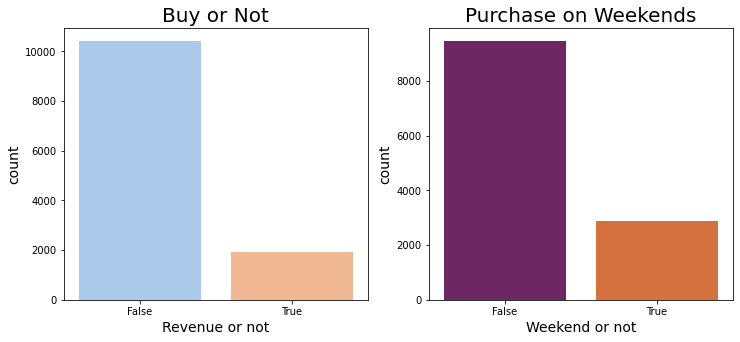

In [ ]:
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1,2,1)
sns.countplot(dataset['Revenue'], palette='pastel')
plt.title('Buy or Not', fontsize=20)
plt.xlabel('Revenue or not', fontsize=14)
plt.ylabel('count', fontsize=14)
# checking the Distribution of customers on Weekend
plt.subplot(1,2,2)
sns.countplot(dataset['Weekend'], palette='inferno')
plt.title('Purchase on Weekends', fontsize=20)
plt.xlabel('Weekend or not', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

# Data Pre-processing: Handling Missing Value 

In [ ]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


In [ ]:
#Drop rows with missing value   
dataset_clean = dataset.dropna()  
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


Mengisi record yang hilang ini dengan nilai rataan atau mean

In [ ]:
print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

Metode imputing missing value dengan menggunakan nilai median

In [ ]:
dataset1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

# Data Preprocessing: Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


**Konversi string ke numerik.**





Karena setiap algoritma machine learning bekerja dengan menggunakan nilai numeris, maka kita perlu mengubah kolom dengan tipe pandas object atau str ini ke bertipe numeris



In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


**Features & Label**

Dalam dataset user online purchase, label target sudah diketahui, yaitu kolom Revenue yang bernilai 1 untuk user yang membeli dan 0 untuk yang tidak membeli, sehingga pemodelan yang dilakukan ini adalah klasifikasi. Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X dan [Revenue] adalah variabel Target yang dideklarasikan sebagai y. Gunakan fungsi drop() untuk menghapus kolom [Revenue] dari dataset.

In [ ]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape) 
print("Shape of Y:", y.shape)

Shape of X: (12330, 17)
Shape of Y: (12330,)


# Training dan Test Dataset

sebelum kita melatih model dengan suatu algorithm machine , seperti yang saya jelaskan sebelumnya, dataset perlu kita bagi ke dalam training dataset dan test dataset dengan perbandingan 80:20. 80% digunakan untuk training dan 20% untuk proses testing.

Fungsi Training adalah melatih model untuk mengenali pola dalam data, sedangkan testing berfungsi untuk memastikan bahwa model yang telah dilatih tersebut mampu dengan baik memprediksi label dari new observation dan belum dipelajari oleh model sebelumnya.

“Perbandingan lain yang biasanya digunakan adalah 75:25. Hal penting yang perlu diketahui adalah scikit-learn tidak dapat memproses dataframe dan hanya mengakomodasi format data tipe Array. Tetapi kalian tidak perlu khawatir, fungsi train_test_split( ) dari Scikit-Learn, otomatis mengubah dataset dari dataframe ke dalam format array.

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


**Training Model: Fit**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train,y_train)

**Training Model: Predict**

In [ ]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


# Evaluasi Model Performance

Untuk evaluasi model performance, setiap algorithm mempunyai metrik yang berbeda-beda, Metrik paling sederhana untuk mengecek performansi model adalah accuracy.
Kita bisa munculkan dengan fungsi .score( ). Tetapi, di banyak real problem, accuracy saja tidaklah cukup. Metode lain yang digunakan adalah dengan Confusion Matrix. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8605028386050284

Confusion matrix:
[[1882  162]
 [ 182  240]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2044
        True       0.60      0.57      0.58       422

    accuracy                           0.86      2466
   macro avg       0.75      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466



Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan Accuracy, tetapi jika tidak seimbang, maka sebaiknya menggunakan F1-Score.

Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan Recall.

Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan Precision.

Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).

# Supervised Learning - Algorithm

## Classification - Logistic Regression
dengan memanfaatkan Scikit-Learn sangatlah mudah. Dengan menggunakan dataset yang sama yaitu online_raw, dan setelah dataset dibagi ke dalam Training Set dan Test Set, cukup menggunakan modul linear_model dari Scikit-learn, dan memanggil fungsi LogisticRegression() yang diberi nama logreg.

Kemudian, model yang sudah ditraining ini  bisa digunakan untuk memprediksi output/label dari test dataset sekaligus mengevaluasi model performance dengan fungsi score(), confusion_matrix() dan classification_report().

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.8806772100567721
Testing Accuracy : 0.8584752635847527

Confusion matrix
[[2011   33]
 [ 316  106]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.76      0.25      0.38       422

    accuracy                           0.86      2466
   macro avg       0.81      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Classification - Decision Tree
Decision Tree merupakan salah satu metode klasifikasi yang populer dan banyak diimplementasikan serta mudah diinterpretasi. Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem.

Decision tree terdiri dari :
**=** Decision Node yang merupakan feature/input variabel;
**=** Branch yang ditunjukkan oleh garis hitam berpanah, yang adalah rule/aturan keputusan, dan
**= ** Leaf yang merupakan output/hasil.

Decision Node paling atas dalam decision tree dikenal sebagai akar keputusan, atau feature utama yang menjadi asal mula percabangan. Jadi, decision tree membagi data ke dalam kelompok atau kelas berdasarkan feature/variable input, yang dimulai dari node paling atas (akar), dan terus bercabang ke bawah sampai dicapai cabang akhir atau leaf.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8580697485806975


## Regression: Linear Regression 
Regression merupakan metode statistik dan machine learning yang paling banyak digunakan. Seperti yang dijelaskan sebelumnya, regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (features) dan variabel output (label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.

Model regresi terdiri atas 2 tipe yaitu :

Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.
Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).
Adapun model regresi yang paling umum digunakan adalah Linear Regression.

In [ ]:
#Untuk pemodelan ini kita akan menggunakan data ‘Boston Housing Dataset’. 
#load dataset
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')

In [ ]:
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)


Shape of X: (489, 3)
Shape of y: (489,)


In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


In [ ]:
#import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

### Regression Performance Evaluation


Metode Evaluasi Untuk model regression, kita menghitung selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred) yang disebut error, adapun beberapa metric yang umum digunan:

*   Mean Squared Error (MSE) adalah rata-rata dari squared error
*   Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE
*   Mean Absolute Error (MAE) adalah rata-rata dari nilai absolut error

Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi. Untuk menghitung nilai MSE, RMSE dan MAE dapat dilakukan dengan menggunakan fungsi mean_squared_error () ,  mean_absolute_error () dari scikit-learn.metrics dan untuk RMSE sendiri tidak terdapat fungsi khusus di scikit-learn tapi dapat dengan mudah kita hitung dengan terlebih dahulu menghitung MSE kemudian menggunakan numpy module yaitu, sqrt() untuk memperoleh nilai akar kuadrat dari MSE.







Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


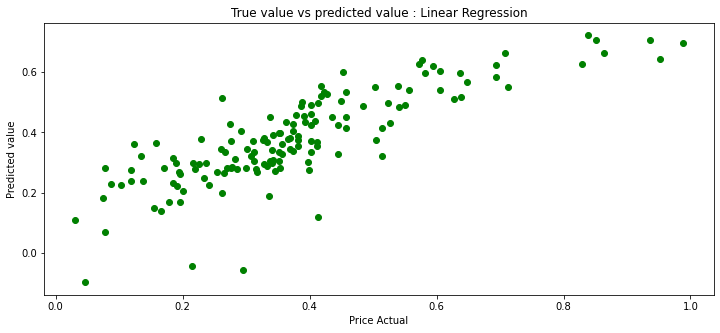

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

# Unsupervised Learning

adalah teknik machine learning dimana tidak terdapat label atau output yang digunakan untuk melatih model. Jadi, model dengan sendirinya akan bekerja untuk menemukan pola atau informasi dari dataset yang ada. Metode unsupervised learning yang dikenal dengan clustering. Sesuai dengan namanya, Clustering memproses data dan mengelompokkannya atau mengcluster objek/sample berdasarkan kesamaan antar objek/sampel dalam satu kluster, dan objek/sample ini cukup berbeda dengan objek/sample di kluster yang lain.

## K-Means Clustering

---
K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat.
kita akan menggunakan dataset ‘Mall Customer Segmentation', Dataset ini merupakan data customer suatu mall dan berisi basic informasi customer berupa : CustomerID, age, gender, annual income, dan spending score.  Adapun tujuan dari clustering adalah untuk memahami customer - customer mana saja yang sering melakukan transaksi sehingga informasi ini dapat diberikan kepada marketing team untuk membuat strategi promosi yang sesuai dengan karakteristik customer.

In [ ]:
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

**Inspect & Visualizing the Cluster**

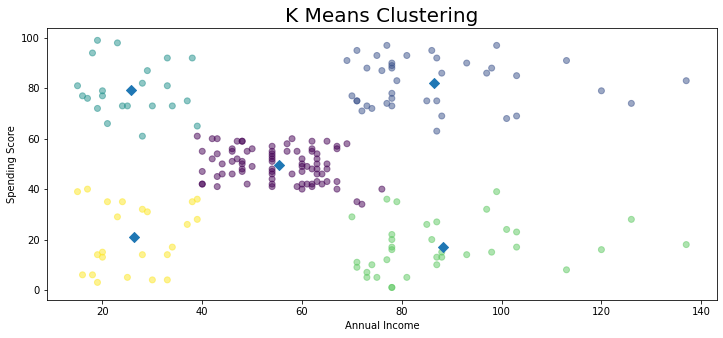

In [ ]:
#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Measuring Cluster Criteria**

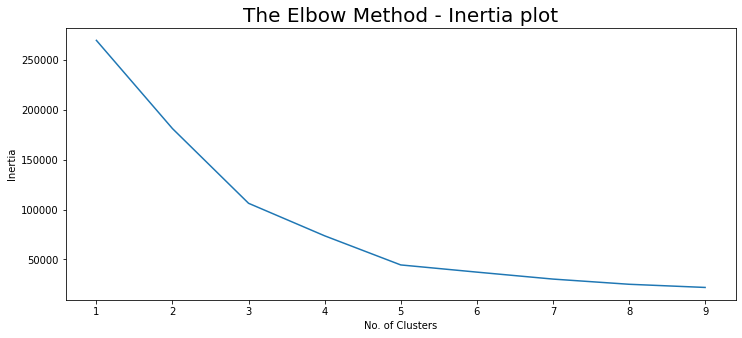

In [ ]:
from sklearn.cluster import KMeans
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value) 
    
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()